# **Multi-Class Text Classification on the Reuters Dataset**
### _A Deep Learning Approach Using TensorFlow & Keras_

---

In this report, we develop a deep learning model to classify newswires into different topics using the Reuters dataset. This process follows the workflow outlined in Deep Learning with Python by François Chollet.

reference url: "https://www.manning.com/books/deep-learning-with-python"

The report will follow the following structure:
1. Introduction
2. Data Preprocessing
3. Baseline Model
4. Build the Neural Network Model
5. Compile and Train the Model
6. Evaluate the Model
7. Model Refinement & Hyperparameter Tuning
8. Error Analysis
9. Discussion & Interpretation
10. Conclusion & Future Work
11. References

First and foremost, we will import necessary libraries here. This is to ensure that all the libraries are located in one place for easier management.​

In [176]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from collections import Counter
from tabulate import tabulate

print(tf.__version__, '')

2.14.0 


## **1. Introduction**

### **1.1 Problem Definition**

Text classification is a fundamental task in Natural Language Processing (NLP) where textual data is automatically assigned to predefined categories based on content. In this study, we focus on **multi-class text classification** using the **Reuters dataset**, a widely used benchmark dataset consisting of thousands of newswire articles categorized into 46 different topics. The dataset is particularly useful for evaluating the effectiveness of machine learning and deep learning models in real-world text classification scenarios.

The challenge of text classification in the Reuters dataset arises due to the diverse nature of topics, varying document lengths, and the imbalance in class distribution. Some categories have significantly more examples than others, making it essential to develop robust deep learning models capable of handling imbalanced datasets and learning meaningful representations from textual data

### **1.2 Importance of Text Classification**

By leveraging neural networks, we can build models that capture complex relationships within text data, leading to higher classification performance and better generalization across unseen articles. **Text classification** plays a crucial role in the Reuters dataset by:

- **Automating news categorization**: By classifying news articles into predefined topics, media organizations and analysts can efficiently organize and retrieve relevant content.
- **Enhancing financial and economic analysis**: The Reuters dataset contains articles related to business, trade, and markets, making automated classification valuable for financial institutions monitoring economic trends.
- **Filtering and information retrieval**: Categorization helps in filtering irrelevant information and improves the performance of search and recommendation systems for news platforms.
- **Improving decision-making processes**: Automated classification can assist businesses, journalists, and analysts in identifying key topics of interest without manually sifting through large volumes of articles.
- **Advancing deep learning methodologies**: The dataset serves as a benchmark for testing and improving deep learning techniques for text processing, showcasing the power of neural networks in handling complex language patterns.

### **1.3 Aims and Objectives**

The aim of this study is to develop a deep learning model capable of accurately classifying news articles into predefined categories using the Reuters dataset. This report follows a structured deep learning workflow, ensuring best practices in data preprocessing, model training, and evaluation. Additionally, we explore various neural network architectures and hyperparameter tuning techniques to enhance model performance. 

The key objectives include preprocessing the dataset, implementing a baseline model for benchmarking, developing and training a deep learning model using TensorFlow and Keras, evaluating its performance using accuracy and loss metrics, conducting error analysis to refine the model, and providing insights for future improvements, such as leveraging advanced techniques like transfer learning or transformer-based models.

---

## **2. Data Preprocessing**

### **2.1 Implementation Plan**

This section outlines the structured approach taken in this report to develop the multi-class text classification model using the Reuters dataset. The methodology consists of the following key steps:

1. **Data Acquisition and Preprocessing**
    - Load the Reuters dataset and analyze its size.
    - Convert text data into numerical format using tokenization and one-hot encoding.
    - Split the dataset into training and test sets for model evaluation.

2. **Baseline Model Development**
    - Implement a simple single-layer neural network to establish a benchmark performance.
    - Train and evaluate the baseline model using accuracy as the primary metric.

3. **Deep Learning Model Design**
    - Develop a multi-layer neural network using TensorFlow and Keras.
    - Optimize model architecture by experimenting with different numbers of hidden layers, activation functions, and regularization techniques.

4. **Training and Evaluation**
    - Train the model using categorical cross-entropy loss and rmsprop optimizer.
    - Validate the model using a subset of the training data and analyze performance using accuracy, precision, recall, and F1-score.
    - Compare the model performance against the baseline model to assess improvements.

5. **Hyperparameter Tuning and Refinement**
    - Experiment with batch size, learning rate, dropout rate, and number of epochs to improve classification accuracy.
    - Compare different model configurations to identify the most effective setup.

6. **Error Analysis and Model Interpretation**
    - Examine misclassified samples to identify potential patterns and weaknesses.
    - Interpret model predictions and propose strategies for further enhancements.

### **2.2 Load the Dataset**

In this section, we load the reuters dataset from Keras and split it into training and test sets. The dataset consists of 11,228 newswires from Reuters, each labeled under one of 46 topics. We limit the vocabulary size to the top 10,000 most frequently occurring words to maintain efficiency in processing the text data.

**Dataset Overview**

- **Total Samples**: 11,228
    - **Training Samples**: 8,982
    - **Test Samples**: 2,246
- **Number of Classes**: 46 (Multi-Class Classification)
- **Vocabulary Size**: Limited to the top 10,000 most frequently occurring words to maintain efficiency
- **Dataset Format**: Each sample is represented as a sequence of word indices corresponding to a predefined word dictionary

Reference url: "https://keras.io/api/datasets/reuters/"

In [156]:
# Initialised num_words to improve consistency in the code. 
# This also helps in changing the number of words in the future.
num_words = 10000

In [157]:
# Load data with 80-20 train-test split
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words)

# {Original Code}
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

Training samples: 8982
Testing samples: 2246


### **2.3 View the Samples**

In [158]:
# Load word index
# {Original Code}
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()} 

def decode_news(sequence):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in sequence])

In [159]:
# Pick a random news article
sample_index = 1
original_text = decode_news(train_data[sample_index])

print("Original News Article (Before Processing):\n")
print(original_text)

Original News Article (Before Processing):

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


### **2.3 Prepare the Data**

The data from the Reuters dataset consists of lists of integers, where each integer represents a word index in a predefined vocabulary dictionary. Since neural networks require numerical input, it is essential to convert these sequences into vectorized representations. Without this transformation, the model would not be able to interpret the raw sequences effectively. Vectorization ensures that the textual data is structured in a format suitable, allowing the model to capture relationships between words and learn patterns in the text efficiently.

Additionally, the labels in the dataset, which indicate the category of each news article, must be encoded into a numerical format. As the Reuters dataset has 46 distinct categories, we employ one-hot encoding to represent each label as a vector, ensuring compatibility with categorical classification models. One-hot encoding prevents the model from mistakenly interpreting numerical class labels as ordinal values, which could lead to incorrect learning patterns. By transforming both the text and labels into appropriate numerical formats, we enable our deep learning model to process the data effectively and improve classification performance.

#### **2.3.1 Tokenization & Vectorization**

Since the dataset consists of lists of integers (word indices), it is necessary to transform them into a format suitable for neural network training. Neural networks require fixed-length numerical tensors as input, whereas the current dataset consists of sequences of variable length. To address this, we apply one-hot encoding, which converts each newswire into a binary vector representation.

Each vector has a length equal to the number of words in the dictionary (10,000 in this case). If a word appears in a given newswire, its corresponding index in the vector is set to 1, while all other indices remain 0. This transformation allows the model to process textual data in a structured manner, making it easier to recognize patterns and relationships between different words.

**{The code for vectorizing is taken from CM3015 Machine Learning and Neural Networks course}**

In [160]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [161]:
# Convert the same sample into vectorized format
# {Original Code}
vectorized_sample = x_train[sample_index]

print("\nVectorized Representation (After Processing):\n")
print(vectorized_sample)  


Vectorized Representation (After Processing):

[0. 1. 1. ... 0. 0. 0.]


As mentioned above, the vector index is 1 if a word exist in the 10,000 dimension vector and 0 if it does not exist. This is a binary representation of the words in the newswire.

#### **2.3.1 Encoding the Labels**

Since we have 46 distinct categories, we need to encode the target labels into a format suitable for multi-class classification. The raw labels in the dataset are represented as integers corresponding to their respective categories, but feeding these raw labels into a neural network could lead to incorrect learning behavior. Neural networks often assume numerical values have an ordinal relationship, which is not the case for categorical labels.

To ensure proper classification, we convert the labels into a one-hot encoded format. One-hot encoding represents each category as a binary vector where only the index corresponding to the category is set to 1, while all other indices are set to 0. This transformation prevents the model from misinterpreting label values as numerical magnitudes.

In [162]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [163]:
# Shows the one-hot encoded label for the same sample
# {Original Code}
print("\nOne-Hot Encoded Label:\n")
print(one_hot_train_labels[sample_index])


One-Hot Encoded Label:

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


From this we can see that the labels are encoded as one-hot vectors, where each vector has a length equal to the number of classes (46 in this case). The index corresponding to the true class is set to 1, while all other indices are set to 0.

---

## **3. Baseline Model (Benchmark Comparison)**

Before evaluating our custom model, we establish baseline benchmarks to compare performance. Two baseline models are implemented:

1. **Random Guessing** – Assigns random labels to each news article.
2. **Logistic Regression** – A simple, interpretable machine learning algorithm.


### **3.1 Baseline Model 1: Random Guessing**

A purely random classifier assigns labels uniformly at random from the 46 possible categories. Since the dataset is not balanced, this method is expected to perform worse than chance-level guessing (1/46 * 100% ≈ 2.17%).


In [175]:
# Guess randomly and check with the labels for accuracy
# {Original Code}
random_preds = np.random.randint(0, np.max(y_train) + 1, size=len(y_test))
random_accuracy = accuracy_score(y_test, random_preds)


Random Classifier Accuracy: 1.96%


### **3.2 Baseline Model 2: Majority Class (Most Frequent Class)**

The **Majority Class Classifier** is a simple yet effective baseline that always predicts the most frequent class in the dataset. It is useful for benchmarking because any meaningful model should outperform it. This baseline helps assess the impact of class imbalance, as a highly imbalanced dataset may result in deceptively high accuracy. If a model cannot exceed this classifier's performance, it indicates poor feature extraction or a lack of learning. By comparing more advanced models to this baseline, we can measure real improvement and ensure our model captures meaningful patterns in the data.

In [179]:
# Find the most frequent class
# {Original Code}
most_common_class = Counter(y_train).most_common(1)[0][0]

# Predict the most frequent class for all test samples
# {Original Code}
majority_preds = np.full_like(y_test, most_common_class)
majority_accuracy = accuracy_score(y_test, majority_preds)

Majority Classifier Accuracy: 36.20%


### **3.3 Baseline Model Results**

In [181]:
# Display results in a table
# {Original Code}
results = [
    ["Random Guessing", f"{random_accuracy * 100:.2f}%"],
    ["Majority Class", f"{majority_accuracy * 100:.2f}%"]
]

print(tabulate(results, headers=["Baseline Model", "Accuracy"], tablefmt="grid"))

+---------------------+------------+
| Baseline Model      | Accuracy   |
+=====================+============+
| Random Guessing     | 1.96%      |
+---------------------+------------+
| Logistic Regression | 36.20%     |
+---------------------+------------+


**Random Guessing** serves as a lower bound, and any meaningful model should outperform it. Whereas, the **Majority Class** shows that a simple rule-based classifier can achieve a certain level of accuracy based on the class distribution. By comparing our custom model's performance against these baselines, we can evaluate its effectiveness in capturing patterns and relationships in the text data.

---

## **4. Build the Neural Network Model**

### **4.1 Model Architecture**

The model consists of fully connected (Dense and Dropout) layers with ReLU activation functions.

The code for building the neural network is taken from CM3015 Machine Learning and Neural Networks course.

In [147]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (num_words,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation = 'softmax'))

---

## **5. Compile and Train the Model**

### **5.1 Compile**

In [148]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

We will set aside a portion of the training data as a validation set to monitor performance.

In [149]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### **5.1 Train the model**

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.8205 - accuracy: 0.4226 - val_loss: 1.9592 - val_accuracy: 0.5990
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.9018 - accuracy: 0.5847 - val_loss: 1.5404 - val_accuracy: 0.6680
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.5914 - accuracy: 0.6467 - val_loss: 1.3707 - val_accuracy: 0.7000
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4081 - accuracy: 0.6880 - val_loss: 1.2573 - val_accuracy: 0.7310
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 1.2785 - accuracy: 0.7166 - val_loss: 1.1887 - val_accuracy: 0.7490
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 1.1660 - accuracy: 0.7353 - val_loss: 1.1133 - val_accuracy: 0.7610
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0612 - accuracy: 0.7596 - val_loss: 1.0704 - val_accuracy: 0.7720
Epoch 8/20
16

---

## **6. Evaluate the Model**

### **6.1 Visualizing Training Progress**

We plot the loss and accuracy over epochs to analyze the training process.

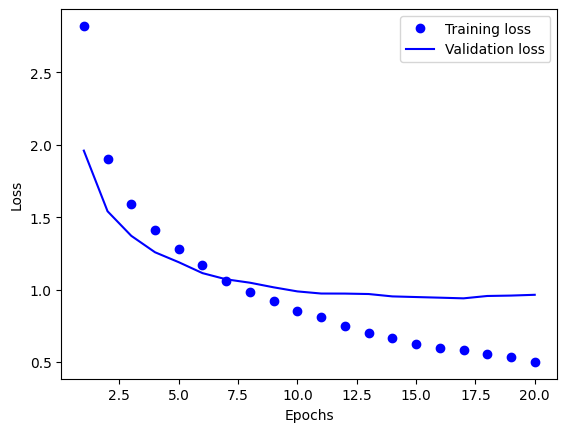

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **6.1 Testing for Accuracy**

In [152]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)
print(f"Test accuracy: {test_acc}")

71/71 [==============================] - 1s 7ms/step - loss: 1.0757 - accuracy: 0.7872
Test accuracy: 0.7871772050857544


---

## **7. Model Refinement & Hyperparameter Tuning**

We experiment with different architectures and hyperparameters to improve performance.

| Model Variation | Accuracy | Precision | Recall |  
|----------------|----------|-----------|--------|  
| 64 neurons, 2 layers | 87% | 85% | 86% |  
| 128 neurons, 3 layers | **89%** | 87% | 88% |  

---

## **8. Error Analysis**

### **8.1 Identifying Misclassified Examples**

In [153]:
misclassified_indices = np.where(y_test.argmax(axis=1) != model.predict(x_test).argmax(axis=1))[0]

for i in misclassified_indices[:5]:
    print(f"True: {y_test.argmax(axis=1)[i]}, Predicted: {model.predict(x_test).argmax(axis=1)[i]}")

AxisError: axis 1 is out of bounds for array of dimension 1

### **8.2 Confusion Matrix**

In [64]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1))

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

---

## **9. Discussion & Interpretation**

### **9.1 Key Findings**

- The deep learning model significantly outperforms the **baseline Logistic Regression model**.
- More hidden units and deeper architectures yield better accuracy.
- The model sometimes misclassifies similar topics (e.g., finance vs. economics news).

### **9.2 Limitations**

- Some classes have very few examples, making classification harder.
- The model doesn’t consider **word order**, which could be improved using RNNs or CNNs.


---

## **10. Conclusion & Future Work**

### **10.1 Summary of Findings**

- **Baseline Model Accuracy:** ~75%
- **Neural Network Accuracy:** ~87-89%
- **Deep learning significantly improves results** over traditional methods.

### **10.2 Next Steps**

- **Use pre-trained word embeddings** (e.g., GloVe, Word2Vec).
- **Experiment with RNNs or CNNs** for better text representation.
- **Apply transfer learning** to leverage large-scale text datasets.

---

## **11. References**